This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [24]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [25]:
train_data[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


In [26]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [27]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [28]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [31]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 3s 69ms/step - loss: 0.5708 - accuracy: 0.7711 - val_loss: 0.4447 - val_accuracy: 0.8598
Epoch 2/4
30/30 [==============================] - 1s 22ms/step - loss: 0.3679 - accuracy: 0.8823 - val_loss: 0.3411 - val_accuracy: 0.8745
Epoch 3/4
30/30 [==============================] - 1s 25ms/step - loss: 0.2740 - accuracy: 0.9105 - val_loss: 0.3182 - val_accuracy: 0.8744
Epoch 4/4
30/30 [==============================] - 1s 22ms/step - loss: 0.2208 - accuracy: 0.9260 - val_loss: 0.2879 - val_accuracy: 0.8837


In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

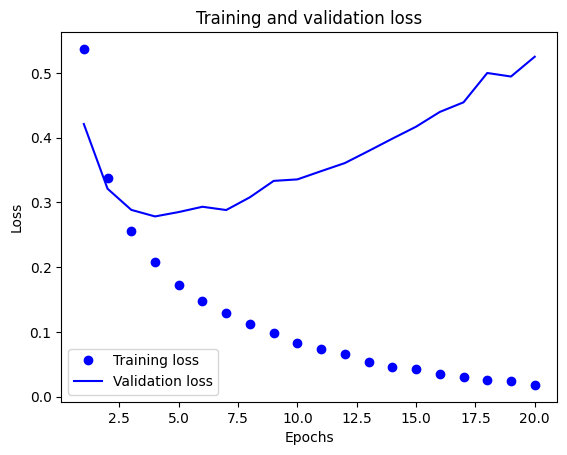

In [33]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

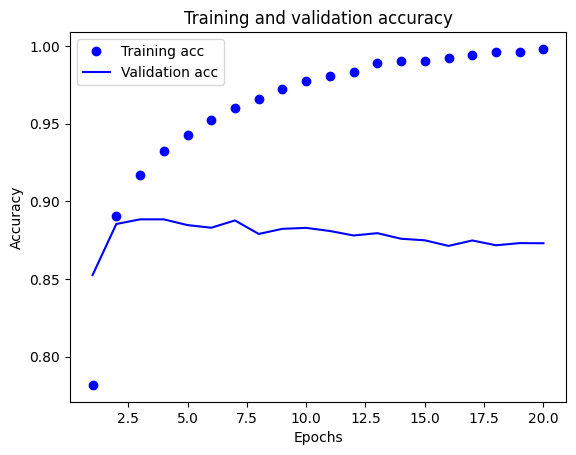

In [34]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
18/18 [==============================] - 3s 15ms/step - loss: -13.1369 - accuracy: 0.0463
Epoch 2/4
18/18 [==============================] - 0s 14ms/step - loss: -51.8625 - accuracy: 0.0481
Epoch 3/4
18/18 [==============================] - 0s 14ms/step - loss: -105.9411 - accuracy: 0.0481
Epoch 4/4
71/71 [==============================] - 0s 3ms/step - loss: -237.5479 - accuracy: 0.0467


In [14]:
results

[0.3098882734775543, 0.8763599991798401]

In [16]:
#logistic regression model

model = keras.Sequential([
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.5917 - accuracy: 0.7745
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4709 - accuracy: 0.8599
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4029 - accuracy: 0.8796
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3747 - accuracy: 0.8732


In [17]:
results

[0.3746689558029175, 0.8731600046157837]

In [9]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4558 - accuracy: 0.8264
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2883 - accuracy: 0.9027
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2345 - accuracy: 0.9170
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2841 - accuracy: 0.8872


In [10]:
results

[0.28408896923065186, 0.8871600031852722]

In [11]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 38ms/step - loss: 0.5255 - accuracy: 0.7933
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.3032 - accuracy: 0.8931
Epoch 3/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2277 - accuracy: 0.9167
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2887 - accuracy: 0.8848


In [12]:
results

[0.28868576884269714, 0.8847600221633911]

### Using a trained model to generate predictions on new data

In [15]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.18279025],
       [0.9998614 ],
       [0.71612275],
       ...,
       [0.06386113],
       [0.05819632],
       [0.45575717]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [35]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [36]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [37]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [6]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [38]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [42]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6980 - accuracy: 0.4977 - val_loss: 1.8449 - val_accuracy: 0.6050
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.5629 - accuracy: 0.6680 - val_loss: 1.3885 - val_accuracy: 0.7000
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1994 - accuracy: 0.7467 - val_loss: 1.1912 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9748 - accuracy: 0.7910 - val_loss: 1.0769 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8065 - accuracy: 0.8249 - val_loss: 1.0017 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6715 - accuracy: 0.8584 - val_loss: 0.9468 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5670 - accuracy: 0.8786 - val_loss: 0.8973 - val_accuracy: 0.8160
Epoch 8/20
16

**Plotting the training and validation loss**

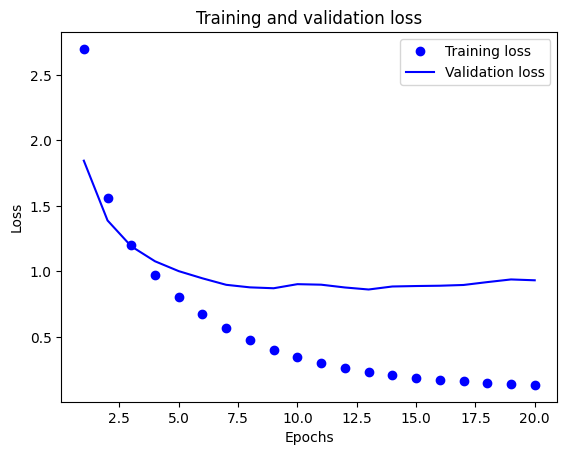

In [46]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

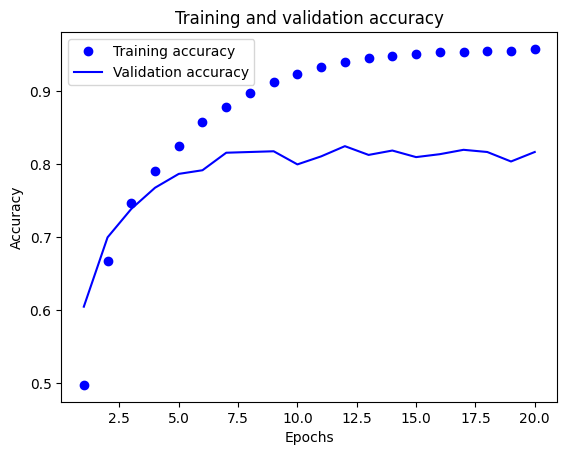

In [47]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [48]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 14ms/step - loss: 2.6228 - accuracy: 0.5035
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.4666 - accuracy: 0.6903
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.1295 - accuracy: 0.7630
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9130 - accuracy: 0.8084
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7490 - accuracy: 0.8427
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6166 - accuracy: 0.8699
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5107 - accuracy: 0.8890
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4292 - accuracy: 0.9089
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9178 - accuracy: 0.7925


In [49]:
results

[0.9178481101989746, 0.7925200462341309]

In [50]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19946571682991987

### Generating predictions on new data

In [51]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [52]:
predictions[0].shape

(46,)

In [53]:
np.sum(predictions[0])

0.9999999

In [54]:
np.argmax(predictions[0])

3

In [55]:
test_labels[0]

3

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [62]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/9
63/63 [==============================] - 2s 14ms/step - loss: 2.6703 - accuracy: 0.4068 - val_loss: 1.9132 - val_accuracy: 0.5830
Epoch 2/9
63/63 [==============================] - 1s 9ms/step - loss: 1.6127 - accuracy: 0.5808 - val_loss: 1.5137 - val_accuracy: 0.5800
Epoch 3/9
63/63 [==============================] - 0s 6ms/step - loss: 1.3282 - accuracy: 0.6338 - val_loss: 1.3988 - val_accuracy: 0.6450
Epoch 4/9
63/63 [==============================] - 0s 6ms/step - loss: 1.1619 - accuracy: 0.6919 - val_loss: 1.2972 - val_accuracy: 0.7020
Epoch 5/9
63/63 [==============================] - 0s 6ms/step - loss: 1.0480 - accuracy: 0.7433 - val_loss: 1.2713 - val_accuracy: 0.7070
Epoch 6/9
63/63 [==============================] - 0s 5ms/step - loss: 0.9590 - accuracy: 0.7596 - val_loss: 1.2425 - val_accuracy: 0.7180
Epoch 7/9
63/63 [==============================] - 0s 6ms/step - loss: 0.8922 - accuracy: 0.7719 - val_loss: 1.2607 - val_accuracy: 0.7140
Epoch 8/9
63/63 [=========

In [63]:
results

[0.9178481101989746, 0.7925200462341309]

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary